In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from scipy import signal
from scipy.signal.windows import gaussian
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.cm as cmap
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:

colorsx = ['sienna', 'seashell', 'chocolate', 'saddlebrown', 'sandybrown', 'peachpuff', 'peru', 'linen', 'bisque', 'darkorange', 'burlywood', 'antiquewhite', 'tan',
          'navajowhite', 'blanchedalmond', 'papayawhip', 'moccasin', 'orange', 'wheat', 'oldlace', 'darkgoldenrod', 'goldenrod', 'cornsilk', 'gold']
colorsr = ['pink', 'lightpink', 'palevioletred', 'rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'crimson',
           'sienna', 'chocolate', 'saddlebrown',]

color_index = np.linspace(0.3 , 2, 51)
color_index[0] = 0.25
colorsr = [cm.Reds(index) for index in color_index]

color_index = np.linspace(0.4 , 3, 51)
color_index[0] = 0.25
colorsb = [cm.Blues(index) for index in color_index]

color_index = np.linspace(0.4 , 3, 4)
color_index[0] = 0.25
colorspb = [cm.BuPu(index) for index in color_index]

In [24]:
# File-reading cell

response = np.load('data/response_FD_TV_0.4.npz')
A = response['arr1']
js = response['arr2']
hoft = response['arr3']
ct_l = response['arr4']
FD_correlations = np.load('data/correlations_FD.npz')
ft_A = FD_correlations['arr1']
corr_FD = FD_correlations['arr2']
wax = FD_correlations['arr3']  
a_damped = FD_correlations['arr5']

nt = 2000
tmax = 80
tax = np.linspace(0, tmax, nt)
dt = tax[1]-tax[0]

Text(0.5, 0, '$t$')

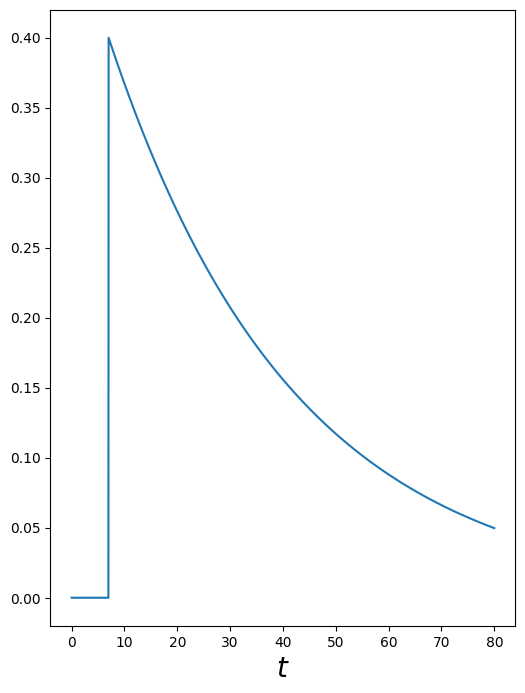

In [25]:
plt.figure(figsize=(6,8))
plt.plot(tax, ct_l)

# plt.yticks([0.00,-0.20,-0.40],[0.00,'$\\minus0.20$',' $\\minus0.40$'], fontsize=16)
# plt.xticks([0,20,40,60,80],[0,20,40,60,80], fontsize=18)

plt.xlabel('$t$',fontsize=20)
# plt.savefig('field_time.pdf', transparent = True)

Text(0.5, 0, '$t$')

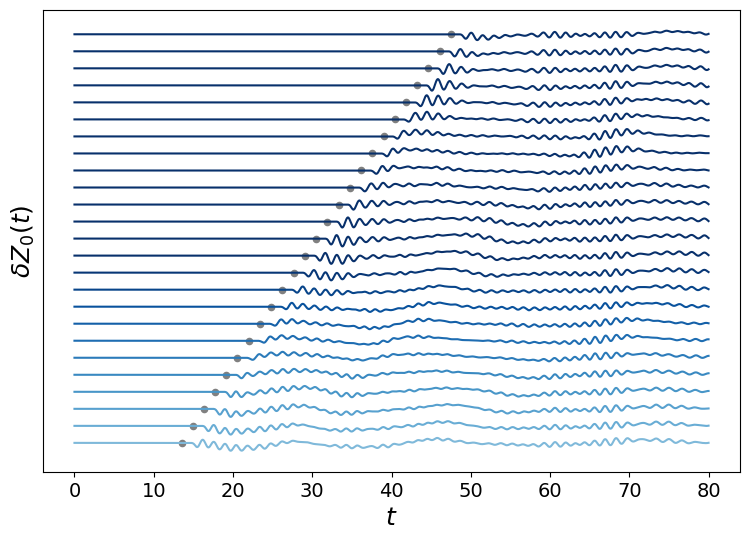

In [26]:
fig,ax = plt.subplots(figsize=(9,6))
tp = np.linspace(15,50,100)
index=0

for j in range(1,len(js),4):   
     
    index +=1
    arr = A[5,j,:]-A[5,0,:]
    ax.plot(tax,np.real(arr)+0.0001*j, color = colorsb[index])

    nonzero_indices = np.nonzero(arr)

    if nonzero_indices[0].size > 0:  # Check if non-zero elements exist
        first_nonzero_index = nonzero_indices[0][0]  # First row index

        ax.scatter(tax[first_nonzero_index], np.real(arr[first_nonzero_index])+0.0001*j, c='gray', marker='o', s=20)
        


ax.tick_params(axis='both', labelsize=14)
ax.yaxis.set_major_locator(ticker.NullLocator())
ax.set_ylabel('$\\delta Z_0(t)  $', fontsize = 18)
ax.set_xlabel('$t$', fontsize = 18)
#plt.savefig('fv-tdomain.pdf', transparent=True)

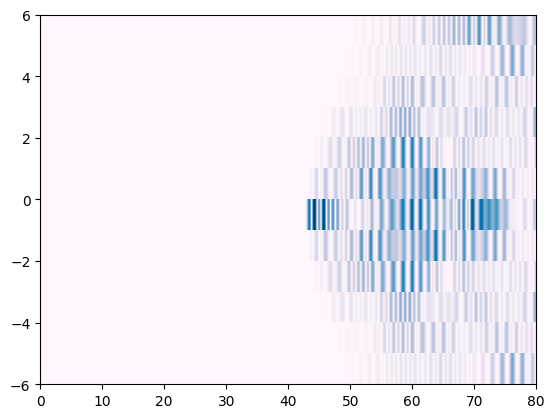

In [27]:

fig, ax = plt.subplots()
f = np.abs(A[:,80,:]-A[:,0,:])
x = [-6,-4,-2,0,2,4,6]#[0,2,4,6,8,10,12]
y = np.linspace(0, tmax, nt)

cb=ax.pcolorfast(y,x,f,cmap=cmap.PuBu)


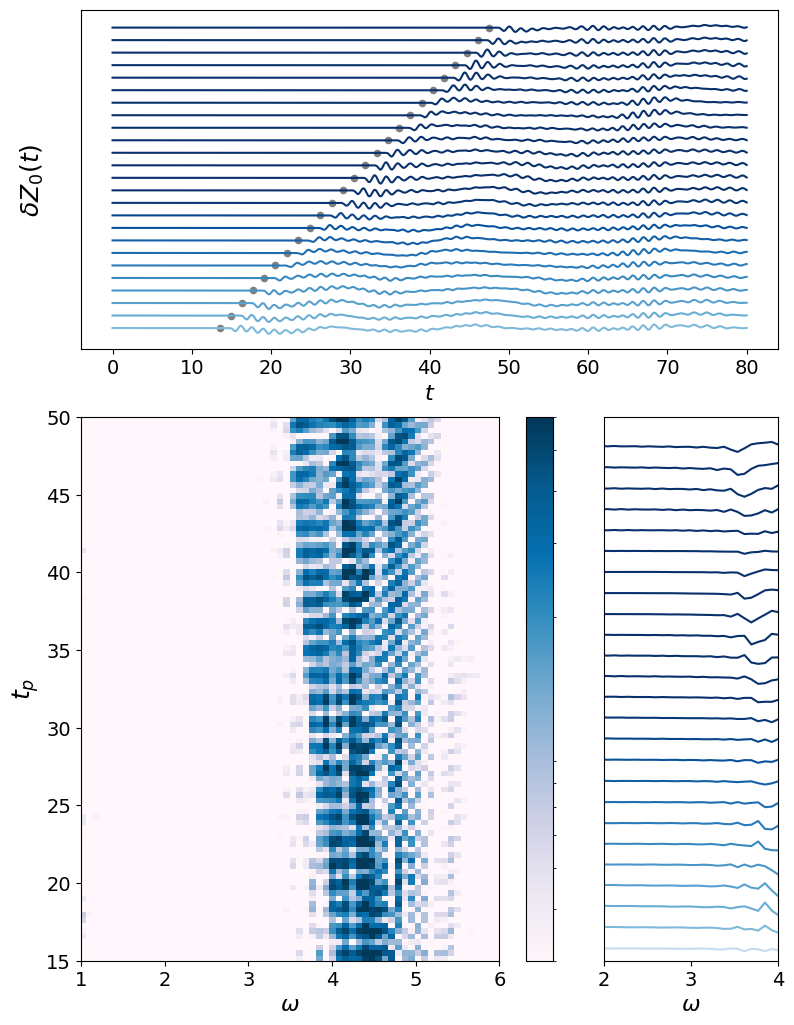

In [28]:
fig = plt.figure(figsize=(9, 15))
gs = gridspec.GridSpec(6,4)

site=5
ax1 = fig.add_subplot(gs[0:2,0:4])
ax2 = fig.add_subplot(gs[2:5,0:3])
ax3 = fig.add_subplot(gs[2:5,3])

index=0
for j in range(1,len(js),4):   
    index +=1
    arr = A[site,j,:]-A[site,0,:]
    ax1.plot(tax,np.real(arr)+0.0001*j, color = colorsb[index])
    nonzero_indices = np.nonzero(arr)
    if nonzero_indices[0].size > 0:  # Check if non-zero elements exist
        first_nonzero_index = nonzero_indices[0][0]  # First row index

        ax1.scatter(tax[first_nonzero_index], np.real(arr[first_nonzero_index])+0.0001*j, c='gray', marker='o', s=20)
ax1.yaxis.set_major_locator(ticker.NullLocator())
ax1.set_ylabel('$\\delta Z_0(t)$', fontsize = 18, labelpad=25)
ax1.set_xlabel('$t$', fontsize = 16)
fd_spect = np.abs(corr_FD[site,1:,:])**2/(12**2)
c = ax2.pcolorfast(wax, js[1:], fd_spect, norm=colors.LogNorm(vmin=3e-11, vmax=6e-10),cmap=cmap.PuBu)
cbar = fig.colorbar(c)
cbar.set_ticks([])

ax2.set_xlim(1.,6)
ax2.set_ylim(15,50)
ax2.set_ylabel('$t_p$', fontsize = 18)

ax2.set_xlabel('$\\omega$', fontsize = 16)
index=0
fd_spect1 = np.abs(corr_FD[site,1:,:]+1)**2/(12**2)
for j in range(1,100,4):  

    log_corr = np.log(fd_spect1[j,:])

    ax3.plot(wax, log_corr + .0009*index, color = colorsb[index])

    index += 1
ax2.set_xticks([1,2,3,4,5,6],[1,2,3,4,5,6])
ax3.set_xlim(2,4)
ax3.set_ylim(bottom=-4.9704)#50)
ax3.set_ylim(top=-4.9470)
ax3.set_xlabel('$\\omega$', fontsize = 16)
ax3.yaxis.set_major_locator(ticker.NullLocator())
ax3.set_xticks([2,3,4],[2,3,4])
plt.subplots_adjust(wspace=0.,hspace=0.5) 
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)
# ax1.text(0.01, 0.99, '$(a)$', horizontalalignment='left', verticalalignment='top', transform=ax1.transAxes, fontsize=14, fontweight='bold',fontname='Times New Roman')
# ax2.text(0.01, 0.99, '$(b)$', horizontalalignment='left', verticalalignment='top', transform=ax2.transAxes, fontsize=14, fontweight='bold')
# ax3.text(0.01, 0.99, '$(c)$', horizontalalignment='left', verticalalignment='top', transform=ax3.transAxes, fontsize=14, fontweight='bold')
#plt.savefig('fv-final2.pdf', transparent = 'True')



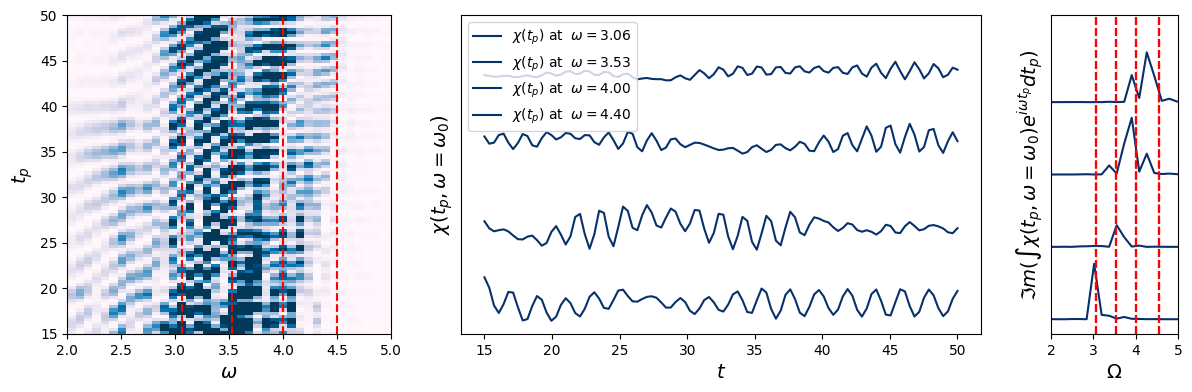

In [374]:
# Appendix Figures

# take a cut at a number of frequencies:
ind_w0=[1039,1045,1051,1056]
w_0=[wax[1039], wax[1045], wax[1051], wax[1056]]
tp = np.linspace(15,50,100)-15
wp = np.fft.fftshift(np.fft.fftfreq(len(tp),d=tp[1]-tp[0]))*2*np.pi

# fig, ax = plt.subplots(1,3, figsize=(12,4))
fig = plt.figure(figsize=(12, 4))
gs = gridspec.GridSpec(1,6)

ax1 = fig.add_subplot(gs[0:2])
ax2 = fig.add_subplot(gs[2:5])
ax3 = fig.add_subplot(gs[5])
fd_w0 = []
for i in range(len(ind_w0)):
    fd_w0.append(corr_FD[5,1:,ind_w0[i]])
    fd_w_w0 = np.fft.fftshift(fft.fft(fd_w0[i]))
    ax2.plot(tp+15, np.real(fd_w0[i])+9e-4*i, label = f'$\\chi(t_p)$ at  $\\omega = {w_0[i]:.2f}$',  color = colorsb[i+1])
    peaks = np.imag(fd_w_w0)/np.max(np.imag(fd_w_w0))
    ax3.plot(wp, peaks**2+1*i,  color = colorsb[i+1])
    # ax3.axhline(np.min(np.imag(peaks)**2)+0.95*i, ls='dotted' ,color='lightgray')
    ax1.pcolorfast(wax, js[1:], fd_spect, cmap=cmap.PuBu, vmin=1e-11,vmax=5e-10)
    ax3.axvline(3.06, color='r', ls='--')
    ax3.axvline(3.53, color='r', ls='--')
    ax3.axvline(4., color='r', ls='--')
    ax3.axvline(4.55, color='r', ls='--')
ax3.set_xlim(2,5)
ax2.legend()
ax2.set_ylim(top=0.0035)
#ax3.set_ylim(top=0.0004)
ax1.axvline(3.06, color='r',ls='--')
ax1.axvline(3.53, color='r',ls='--')
ax1.axvline(4, color='r',ls='--')
ax1.axvline(4.5, color='r',ls='--')
ax1.set_xlim(2.,5)
ax3.yaxis.set_major_locator(ticker.NullLocator())
ax2.yaxis.set_major_locator(ticker.NullLocator())
ax2.set_xlabel('$t$', fontsize=14)
ax3.set_xlabel('$\\Omega$', fontsize=14)
ax2.set_ylabel('$\\chi(t_p, \\omega = \\omega_0)$', fontsize=14)
ax3.set_ylabel('$\\Im m (\\int \\chi(t_p, \\omega = \\omega_0) e^{i\\omega t_p} dt_p)$', fontsize=14)
ax1.set_xlabel('$\\omega$', fontsize=14)
ax1.set_ylabel('$t_p$', fontsize=14)
plt.tight_layout(pad=1, w_pad=2, h_pad=1)

#plt.savefig('tp_dynamics.pdf')

In [29]:
# File-reading cell

response = np.load('data/response_FD_FV_S-0.4_sigma1.5.npz')
A = response['arr1']
js = response['arr2']
hoft = response['arr3']
ct_l = response['arr4']
FD_correlations = np.load('data/correlations_S_FD_sigma1.5_FV.npz')
ft_A = FD_correlations['arr1']
corr_FD = FD_correlations['arr2']
wax = FD_correlations['arr3']  
a_damped = FD_correlations['arr5']

nt = 2000
tmax = 80
tax = np.linspace(0, tmax, nt)
dt = tax[1]-tax[0]

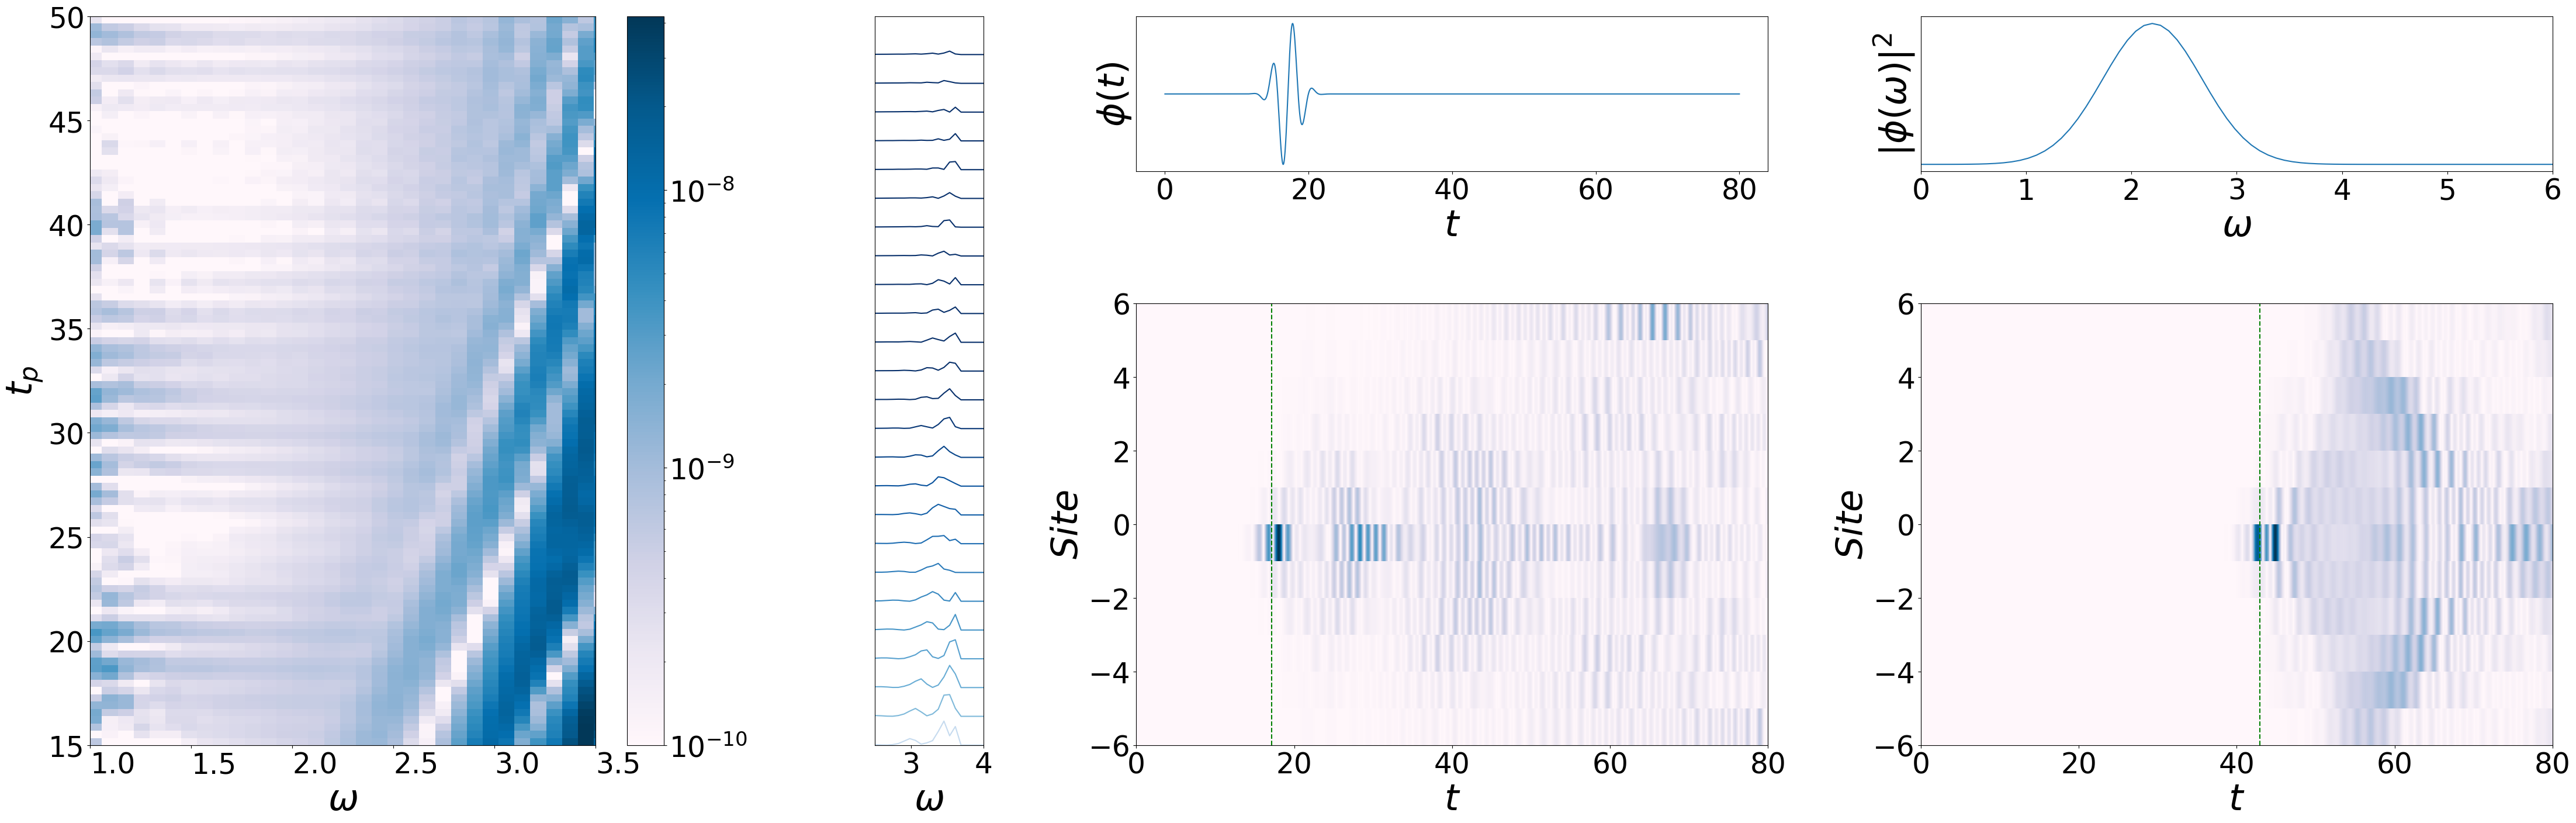

In [31]:

fig = plt.figure(figsize=(45, 15))
gs = gridspec.GridSpec(3, 10)
x = [-6,-4,-2,0,2,4,6]#[0,2,4,6,8,10,12]
y = np.linspace(0, tmax, nt)
fd_spect = np.abs(corr_FD[5,1:,:])**2/(12**2)
ax1 = fig.add_subplot(gs[0:, 0:3])
ax2 = fig.add_subplot(gs[0:, 3])
ax3 = fig.add_subplot(gs[0, 4:7])

ax4 = fig.add_subplot(gs[0, 7:10])
ax5 = fig.add_subplot(gs[1:, 4:7])
ax6 = fig.add_subplot(gs[1:, 7:10])

c=ax1.pcolorfast(wax, js[1:], fd_spect, norm=colors.LogNorm(vmin=1e-10, vmax=float(fd_spect.max())),cmap=cmap.PuBu)
cbar = fig.colorbar(c)
cbar.ax.tick_params(labelsize=35)
ax1.set_xlim(1,3.5)
ax1.set_ylabel('$t_p$', fontsize=45)
ax1.set_xlabel('$\\omega$', fontsize=45)

index=0
for j in range(1,len(js),4):   

    ax2.plot(wax, np.abs(corr_FD[5,j,:])**2/(12**2) + 0.00000005*index, color = colorsb[index])

    index += 1

ax2.set_xlim(2.5,4)
ax2.set_ylim(bottom=0)#50
ax2.yaxis.set_major_locator(ticker.NullLocator())
ax2.set_xlabel('$\\omega$', fontsize=45)

ax3.plot(tax,np.real(hoft[7]))
hofw = np.fft.fftshift(fft.fft(hoft[7]))
ax4.plot(wax,np.abs(hofw)**2)
ax4.set_xlim(0,6)
ax3.set_xlabel('$t$', fontsize=45)
ax4.set_xlabel('$\\omega$', fontsize=45)
ax3.set_ylabel('$\\phi(t)$', fontsize=45)
ax4.set_ylabel('$|\\phi(\\omega)|^2$', fontsize=45)
ax3.yaxis.set_major_locator(ticker.NullLocator())
ax4.yaxis.set_major_locator(ticker.NullLocator())

f = np.abs(A[:,7,:]-A[:,0,:])
cb=ax5.pcolorfast(y,x,f,cmap=cmap.PuBu)
ax5.axvline(js[7], color='green',ls='--')

g = np.abs(A[:,80,:]-A[:,0,:])
cb=ax6.pcolorfast(y,x,g,cmap=cmap.PuBu)
ax6.axvline(js[80], color='green',ls='--')

ax1.tick_params(axis='both', which='major', labelsize=35)
ax2.tick_params(axis='both', which='major', labelsize=35)
ax3.tick_params(axis='x', which='major', labelsize=35)
ax4.tick_params(axis='x', which='major', labelsize=35)
ax5.tick_params(axis='both', which='major', labelsize=35)
ax6.tick_params(axis='both', which='major', labelsize=35)

ax5.set_ylabel('$Site$', fontsize=45)
ax6.set_ylabel('$Site$', fontsize=45)

ax5.set_xlabel('$t$', fontsize=45)
ax6.set_xlabel('$t$', fontsize=45)
plt.setp(ax1.xaxis.get_majorticklabels(), ha="left" )
plt.tight_layout(pad=4, w_pad=6, h_pad=6)
#plt.savefig('bloch_py.pdf')